In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm

In [ ]:
# load the provided data
train_features = pd.read_csv('./data/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data/dengue_labels_train.csv',
                           index_col=[0,1,2])
test_features = pd.read_csv('./data/dengue_features_test.csv',
                             index_col=[0,1,2])

In [ ]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']
sj_test_features = test_features.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']
iq_test_features = test_features.loc['iq']

In [ ]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

sj_test_features.drop('week_start_date', axis=1, inplace=True)
iq_test_features.drop('week_start_date', axis=1, inplace=True)

/home/isabell/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#Filling null values
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

sj_test_features.fillna(method='ffill', inplace=True)
iq_test_features.fillna(method='ffill', inplace=True)

/home/isabell/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
#Split-up train and test set (strict-future holdout set)
sj_train_features_subtrain = sj_train_features.head(800)
sj_train_features_subtest = sj_train_features.tail(sj_train_features.shape[0] - 800)
sj_train_labels_subtrain = sj_train_labels.head(800)
sj_train_labels_subtest = sj_train_labels.tail(sj_train_labels.shape[0] - 800)

iq_train_features_subtrain = iq_train_features.head(400)
iq_train_features_subtest = iq_train_features.tail(iq_train_features.shape[0] - 400)
iq_train_labels_subtrain = iq_train_labels.head(400)
iq_train_labels_subtest = iq_train_labels.tail(iq_train_labels.shape[0] - 400)

In [ ]:
sj_train_features.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                               
1990 18                              295.9                            32.00   
     19                              296.4                            17.94   
     20                              297.3                            26.10   
     21                              297.0                            13.90   
     22                              297.5                            12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weekofyear                                                             
1990 18                    

In [ ]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

## Baseline - Mean

In [ ]:
#mean for sj
sj_pred = sj_train_labels_subtrain.mean()
np.mean( np.abs(sj_train_labels_subtest - sj_pred))

total_cases    26.695257
dtype: float64

In [ ]:
#mean for iq
iq_pred = iq_train_labels_subtrain.mean()
np.mean( np.abs(iq_train_labels_subtest - iq_pred))

total_cases    7.020667
dtype: float64

## Linear Model

In [ ]:
def LinearRegression_dengue(X_train, Y_train, X_test, features, reg=None, alpha=0.1):
    if reg==None:
        reg = LinearRegression()
    elif reg=='Ridge':
        reg = Ridge(alpha=alpha)
    reg.fit(X_train.loc[:, features], Y_train)
    pred = reg.predict(X_test.loc[:, features])
    pred = np.around(pred).astype(int)
    pred[pred <0] = 0
    return pred

## Linear Model with all features

In [55]:
#Test for sj
features = sj_train_features.columns
sj_pred = LinearRegression_dengue(sj_train_features_subtrain, sj_train_labels_subtrain, sj_train_features_subtest, features, reg='Ridge', alpha=3)
mean_absolute_error(sj_train_labels_subtest, sj_pred)

22.74264705882353

In [ ]:
sj_df_plot = sj_train_labels_subtest.copy()
sj_df_plot['prediction'] = sj_pred

Text(0.5, 0, 'Time')

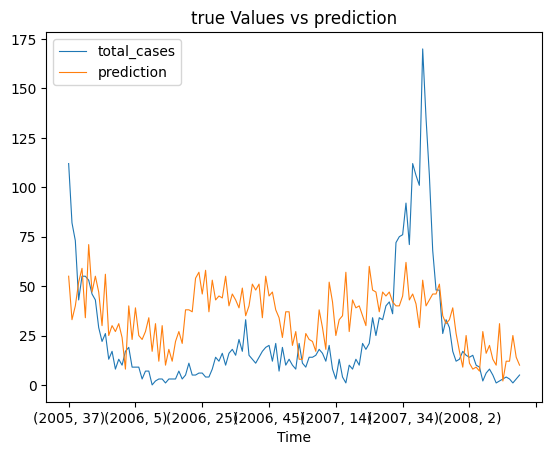

In [ ]:
(sj_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

In [ ]:
#Test for iq
iq_pred = LinearRegression_dengue(iq_train_features_subtrain, iq_train_labels_subtrain, iq_train_features_subtest, features, reg='Ridge', alpha=1)
mean_absolute_error(iq_train_labels_subtest, iq_pred)

7.183333333333334

In [ ]:
iq_df_plot = iq_train_labels_subtest.copy()
iq_df_plot['prediction'] = iq_pred

Text(0.5, 0, 'Time')

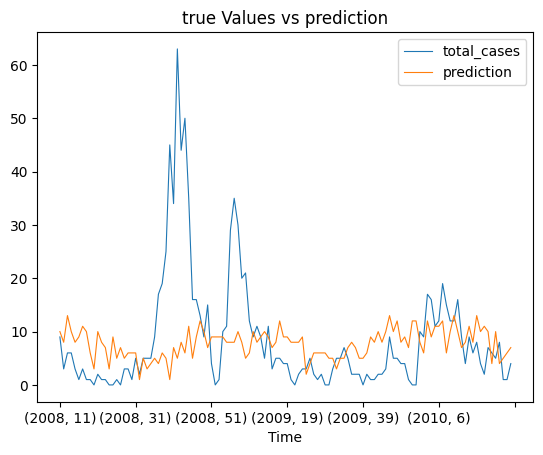

In [ ]:
(iq_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

## Linear model with few features

In [ ]:
features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']

In [48]:
#Test for sj
sj_pred = LinearRegression_dengue(sj_train_features_subtrain, sj_train_labels_subtrain, sj_train_features_subtest, features, reg='Ridge', alpha=0.1)
mean_absolute_error(sj_train_labels_subtest, sj_pred)

22.16176470588235

In [ ]:
sj_df_plot = sj_train_labels_subtest.copy()
sj_df_plot['prediction'] = sj_pred

Text(0.5, 0, 'Time')

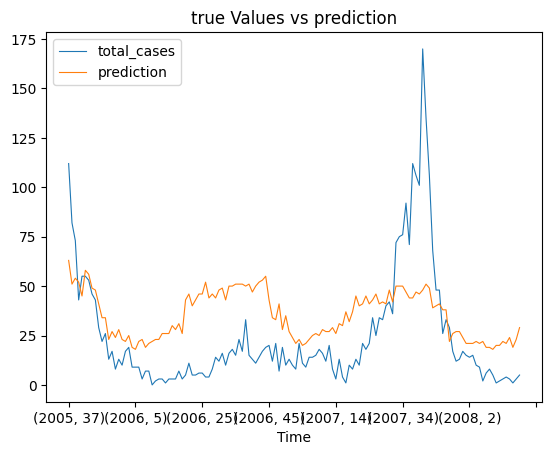

In [ ]:
(sj_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

In [51]:
#Test for iq
iq_pred = LinearRegression_dengue(iq_train_features_subtrain, iq_train_labels_subtrain, iq_train_features_subtest, features, reg='Ridge', alpha=0.1)
mean_absolute_error(iq_train_labels_subtest, iq_pred)

6.65

In [ ]:
iq_df_plot = iq_train_labels_subtest.copy()
iq_df_plot['prediction'] = iq_pred

Text(0.5, 0, 'Time')

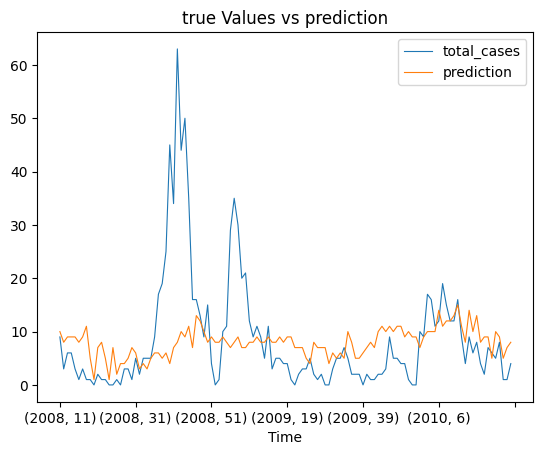

In [ ]:
(iq_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

## XGBoost 

In [ ]:
def XGBoost_dengue(X_train, Y_train, X_test, features):
    xg_reg = xgb.XGBRegressor(eval_metric='mae', learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)
    xg_reg.fit(X_train.loc[:, features], Y_train)
    pred = xg_reg.predict(X_test.loc[:, features])
    pred = np.around(pred).astype(int)
    pred[pred <0] = 0
    return pred

In [ ]:
#features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']
features = sj_train_features.columns

In [ ]:
#Test for sj
sj_pred = XGBoost_dengue(sj_train_features_subtrain, sj_train_labels_subtrain, sj_train_features_subtest, features)
mean_absolute_error(sj_train_labels_subtest, sj_pred)

26.029411764705884

In [ ]:
sj_df_plot = sj_train_labels_subtest.copy()
sj_df_plot['prediction'] = sj_pred

Text(0.5, 0, 'Time')

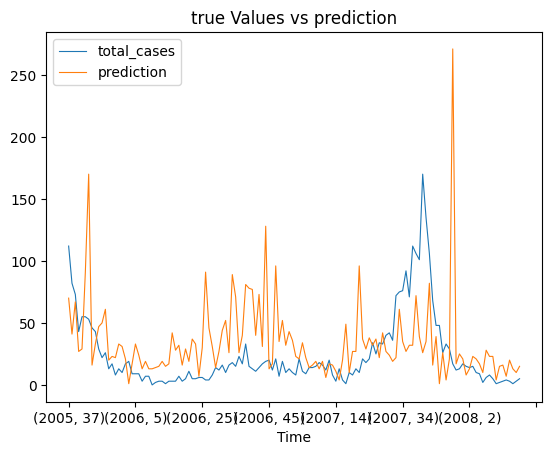

In [ ]:
(sj_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

## First submit with Linear model with few data

In [ ]:
features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']

In [ ]:
sj_pred = LinearRegression_dengue(sj_train_features, sj_train_labels, sj_test_features, features)
iq_pred = LinearRegression_dengue(iq_train_features, iq_train_labels, iq_test_features, features)

In [ ]:
submission = pd.read_csv("./data/submission_format.csv",
                         index_col=[0, 1, 2])
submission

total_cases
city year weekofyear             
sj   2008 18                    0
          19                    0
          20                    0
          21                    0
          22                    0
...                           ...
iq   2013 22                    0
          23                    0
          24                    0
          25                    0
          26                    0

[416 rows x 1 columns]

In [ ]:
submission['total_cases'] = np.concatenate((sj_pred, iq_pred))

In [ ]:
submission.to_csv("./data/baseline.csv")

In [ ]:
submission

total_cases
city year weekofyear             
sj   2008 18                   28
          19                   25
          20                   34
          21                   28
          22                   30
...                           ...
iq   2013 22                    8
          23                    8
          24                    6
          25                    5
          26                    7

[416 rows x 1 columns]

In [ ]:
test_features

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   2008 18              2008-04-29 -0.018900 -0.018900  0.102729  0.091200   
          19              2008-05-06 -0.018000 -0.012400  0.082043  0.072314   
          20              2008-05-13 -0.001500       NaN  0.151083  0.091529   
          21              2008-05-20       NaN -0.019867  0.124329  0.125686   
          22              2008-05-27  0.056800  0.039833  0.062267  0.075914   
...                              ...       ...       ...       ...       ...   
iq   2013 22              2013-05-28  0.301471  0.380029  0.280629  0.383186   
          23              2013-06-04  0.247600  0.296343  0.285371  0.350357   
          24              2013-06-11  0.238729  0.251029  0.252586  0.249771   
          25              2013-06-18  0.310429  0.302700  0.406614  0.403943   
          26              2013-06-25  0.339467  0.240071  0.356943  0.273600   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   
...                                    ...                    ...   
iq   2013 22                         41.12             297.774286   
          23                         71.52             297.167143   
          24                         78.96             295.831429   
          25                         39.54             295.778571   
          26                         51.80             297.372857   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   
...                                     ...                          ...   
iq   2013 22                     298.964286                   295.638571   
          23                     298.328571                   295.845714   
          24                     296.607143                   294.894286   
          25                     297.400000                   293.648571   
          26                     299.000000                   294.615714   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   2008 18                              301.1  ...   
          19                              300.8  ...   
          20                              302.2  ...   
          21                              303.0  ...   
          22                              302.3  ...   
...                                         ...  ...   
iq   2013 22                              305.5  ...   
          23                              306.3  ...   
          24                              304.6  ...   
          25                              305.9  ...   
          26                              307.3  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22          